In [62]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_ct_df = pd.merge(mouse_df, clinical_df, how="outer", on="Mouse ID")

# Display the data table for preview

mouse_ct_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
5,h246,0,45.000000,0
6,p189,0,45.000000,0
7,n923,0,45.000000,0
8,q119,0,45.000000,0
9,f993,0,45.000000,0


## Tumor Response to Treatment

In [27]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [28]:
mean_tumor_volume = mouse_ct_df[["Drug","Timepoint","Tumor Volume (mm3)"]]
mtv_df = mean_tumor_volume.groupby(["Drug","Timepoint"]).mean()

mtv_data = pd.DataFrame(mtv_df)
mtv_data.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [29]:
m_sem_df = mean_tumor_volume.groupby(["Drug","Timepoint"]).sem()

m_sem_data = pd.DataFrame(m_sem_df)
m_sem_data.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [92]:
pivot_table = mtv_data.pivot_table(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table.reset_index(level = None, inplace = True)
pivot_table


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


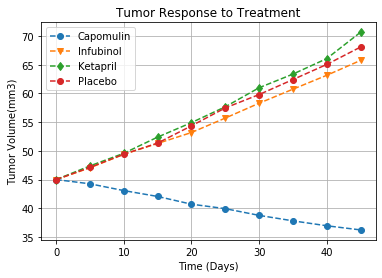

In [77]:
# Generate the Plot (with Error Bars)
plt.figure()

#fig=table_fourdrugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);

plt.errorbar(x=pivot_table['Timepoint'],y=pivot_table['Capomulin'],label='Capomulin', yerr=None, linestyle="--", fmt='o', )
plt.errorbar(x=pivot_table['Timepoint'],y=pivot_table['Infubinol'], label='Infubinol', yerr=None, linestyle="--", fmt='v')
plt.errorbar(x=pivot_table['Timepoint'],y=pivot_table['Ketapril'], label='Ketapril', yerr=None, linestyle="--",fmt='d')
plt.errorbar(x=pivot_table['Timepoint'],y=pivot_table['Placebo'],label="Placebo", yerr=None, linestyle="--", fmt='o')

plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.legend(loc="best")
plt.grid()
plt.legend()       
plt.show()


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [41]:
mean_meta = mouse_ct_df[["Drug","Timepoint","Metastatic Sites"]]
meta_df = mean_meta.groupby(["Drug","Timepoint"]).mean()

meta_data = pd.DataFrame(meta_df)
meta_data.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [44]:
meta_sem_df = mean_meta.groupby(["Drug","Metastatic Sites"]).sem()

m_meta_data = pd.DataFrame(meta_sem_df)
m_meta_data.head()

Timepoint
Drug      Metastatic Sites           
Capomulin 0                  1.087451
          1                  1.412903
          2                  1.704909
          3                  3.058389
Ceftamin  0                  1.025785

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [49]:
pivot_table_meta = meta_data.pivot_table(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table_meta.reset_index(level = None, inplace = True)
pivot_table_meta


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


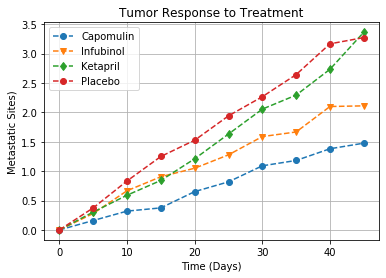

In [76]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
# Generate the Plot (with Error Bars)
plt.figure()

#fig=table_fourdrugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);

plt.errorbar(x=pivot_table_meta['Timepoint'],y=pivot_table_meta['Capomulin'],label='Capomulin', yerr=None, linestyle="--", fmt='o', )
plt.errorbar(x=pivot_table_meta['Timepoint'],y=pivot_table_meta['Infubinol'], label='Infubinol', yerr=None, linestyle="--", fmt='v')
plt.errorbar(x=pivot_table_meta['Timepoint'],y=pivot_table_meta['Ketapril'], label='Ketapril', yerr=None, linestyle="--",fmt='d')
plt.errorbar(x=pivot_table_meta['Timepoint'],y=pivot_table_meta['Placebo'],label="Placebo", yerr=None, linestyle="--", fmt='o')

plt.ylabel('Metastatic Sites)')
plt.xlabel('Time (Days)')
plt.title('Metastatic Spread during Treatment')
plt.legend(loc="best")
plt.grid()
plt.legend()       
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [69]:

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount=mouse_ct_df.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
micecount_df=pd.DataFrame(micecount["Mouse ID"])
micecount_df.reset_index(inplace=True)

#Display dataframe
micecount_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [73]:
pivot_table_mice = micecount_df.pivot_table(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
pivot_table_mice.reset_index(level = None, inplace = True)
pivot_table_mice


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


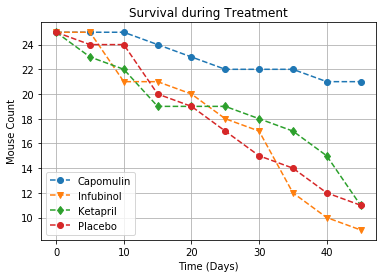

In [83]:
# Generate the Plot (Accounting for percentages)
plt.figure()

#fig=table_fourdrugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);

plt.errorbar(x=pivot_table_mice['Timepoint'],y=pivot_table_mice['Capomulin'],label='Capomulin', yerr=None, linestyle="--", fmt='o', )
plt.errorbar(x=pivot_table_mice['Timepoint'],y=pivot_table_mice['Infubinol'], label='Infubinol', yerr=None, linestyle="--", fmt='v')
plt.errorbar(x=pivot_table_mice['Timepoint'],y=pivot_table_mice['Ketapril'], label='Ketapril', yerr=None, linestyle="--",fmt='d')
plt.errorbar(x=pivot_table_mice['Timepoint'],y=pivot_table_mice['Placebo'],label="Placebo", yerr=None, linestyle="--", fmt='o')

plt.ylabel('Mouse Count')
plt.xlabel('Time (Days)')
plt.title('Survival during Treatment')
plt.legend(loc="best")
plt.grid()
plt.legend()       
plt.show()
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [95]:
#percent_change = pivot_table_mice['Capomulin'][9]/pivot_table_mice['Capomulin'][0]
#percent_change
pc_Capomulin=(pivot_table['Capomulin'][9]-pivot_table['Capomulin'][0])/pivot_table['Capomulin'][0]*100
pc_Infubinol=(pivot_table['Infubinol'][9]-pivot_table['Infubinol'][0])/pivot_table['Infubinol'][0]*100
pc_Ketapril=(pivot_table['Ketapril'][9]-pivot_table['Ketapril'][0])/pivot_table['Ketapril'][0]*100
pc_Placebo=(pivot_table['Placebo'][9]-pivot_table['Placebo'][0])/pivot_table['Placebo'][0]*100



In [97]:
# Store all Relevant Percent Changes into a Tuple

percent_tuple = {'Capomulin': pc_Capomulin, 'Infubinol': pc_Infubinol, 'Ketapril': pc_Ketapril, 'Placebo': pc_Placebo}
pc_tumorvolume = pd.Series(percent_tuple)
pc_tumorvolume

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

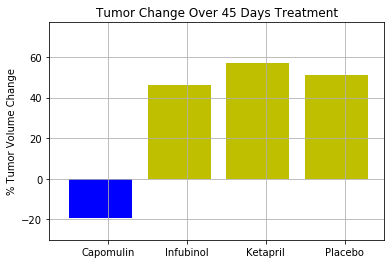

In [104]:
#Index the 4 drugs

testdrugs=pc_tumorvolume.keys()

# Splice the data between passing and failing drugs

summary_bar = plt.subplot()
x_axis = np.arange(0, len(testdrugs))

# Orient widths. Add labels, tick marks, etc. 

tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.5)
plt.xticks(tick_locations, testdrugs)
colors = []
for value in pc_tumorvolume:
    if value >= 0 :
        colors.append('y')
    else:
        colors.append('b')
        
 #Plot       
percent_change = summary_bar.bar(x_axis, pc_tumorvolume, color=colors, align="edge")
# Use functions to label the percentages of changes
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.25, len(testdrugs))
plt.ylim(-30, max(pc_tumorvolume) + 20)
plt.grid()

plt.show()



![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
#Overtime Capomulin seems to be the only drug out of the 4 calculated drugs that reduced the size of the tumor
#Using the Ketapril drug the tumor volume increased more than the placebo.
#Survival rate was the highest in mice using the Capomulin drug